Customer Churn Models

In [1]:
import pandas as pd

data = pd.read_csv("cell2celltrain.csv")

data.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [3]:
data.describe()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,5.104700e+04,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50680.000000,50680.000000,51047.000000,...,51046.000000,51046.000000,51046.000000,50138.000000,50138.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000
mean,3.201957e+06,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,6.011489,...,1.805646,1.558751,380.545841,31.338127,21.144142,0.037201,0.018277,0.052070,4.324524,0.053911
std,1.169056e+05,44.507336,529.871063,23.848871,2.228546,96.588076,9.818294,257.514772,39.574915,9.043955,...,1.331173,0.905932,253.801982,22.094635,23.931368,0.206483,0.142458,0.307592,3.138236,0.383147
min,3.000002e+06,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,...,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.100632e+06,33.610000,158.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.100000,0.700000,...,1.000000,1.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.201534e+06,48.460000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,3.000000,...,1.000000,1.000000,329.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,3.305376e+06,71.065000,723.000000,60.000000,0.990000,41.000000,0.300000,66.000000,1.600000,7.700000,...,2.000000,2.000000,515.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,3.399994e+06,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,221.700000,...,24.000000,15.000000,1812.000000,99.000000,99.000000,4.000000,3.000000,35.000000,9.000000,25.000000


In [5]:
# Display basic information about the dataset
data_info = {
    "shape": data.shape,
    "columns": data.columns.tolist(),
    "missing_values": data.isnull().sum().to_dict(),
    "sample_data": data.head().to_dict(orient="records")
}

data_info

{'shape': (51047, 58),
 'columns': ['CustomerID',
  'Churn',
  'MonthlyRevenue',
  'MonthlyMinutes',
  'TotalRecurringCharge',
  'DirectorAssistedCalls',
  'OverageMinutes',
  'RoamingCalls',
  'PercChangeMinutes',
  'PercChangeRevenues',
  'DroppedCalls',
  'BlockedCalls',
  'UnansweredCalls',
  'CustomerCareCalls',
  'ThreewayCalls',
  'ReceivedCalls',
  'OutboundCalls',
  'InboundCalls',
  'PeakCallsInOut',
  'OffPeakCallsInOut',
  'DroppedBlockedCalls',
  'CallForwardingCalls',
  'CallWaitingCalls',
  'MonthsInService',
  'UniqueSubs',
  'ActiveSubs',
  'ServiceArea',
  'Handsets',
  'HandsetModels',
  'CurrentEquipmentDays',
  'AgeHH1',
  'AgeHH2',
  'ChildrenInHH',
  'HandsetRefurbished',
  'HandsetWebCapable',
  'TruckOwner',
  'RVOwner',
  'Homeownership',
  'BuysViaMailOrder',
  'RespondsToMailOffers',
  'OptOutMailings',
  'NonUSTravel',
  'OwnsComputer',
  'HasCreditCard',
  'RetentionCalls',
  'RetentionOffersAccepted',
  'NewCellphoneUser',
  'NotNewCellphoneUser',
  'Refe

Dataset Overview
- Shape: 51,047 rows and 58 columns
- Target Variable: Churn (Yes/No)
- Notable Features: Includes various customer demographics, handset details, call behaviors, and service metrics
- Missing Data: Missing values in some columns (e.g., MonthlyRevenue, AgeHH1)

In [9]:
# Check columns with missing values and their percentage
missing_summary = data.isnull().sum() / len(data) * 100
missing_columns = missing_summary[missing_summary > 0].sort_values(ascending=False)

# Display missing data summary
missing_columns

AgeHH1                   1.780712
AgeHH2                   1.780712
PercChangeMinutes        0.718945
PercChangeRevenues       0.718945
MonthlyRevenue           0.305601
MonthlyMinutes           0.305601
TotalRecurringCharge     0.305601
DirectorAssistedCalls    0.305601
OverageMinutes           0.305601
RoamingCalls             0.305601
ServiceArea              0.047015
Handsets                 0.001959
HandsetModels            0.001959
CurrentEquipmentDays     0.001959
dtype: float64

Missing Data Overview:
- Columns with the highest missing values:
    - AgeHH1 and AgeHH2: ~1.78%
    - PercChangeMinutes and PercChangeRevenues: ~0.72%
    - Other columns have less than 0.5% missing values.

Strategy to Handle Missing Data
- Low Missing Percentage (<2%):
- Impute missing values:
    - Numeric columns: Use mean/median.
    - Categorical columns: Use mode.
    - Service Area Column: Impute with the most frequent value or treat it as a separate category (Unknown).

Verify and Drop Rows (if necessary):
- If missing values persist post-imputation, we can consider dropping those rows.

In [13]:
# Impute numeric columns with the median value
numeric_columns = ['AgeHH1', 'AgeHH2', 'PercChangeMinutes', 'PercChangeRevenues',
                   'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
                   'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
                   'Handsets', 'HandsetModels', 'CurrentEquipmentDays']

data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

# Impute the 'ServiceArea' column with the mode
data['ServiceArea'] = data['ServiceArea'].fillna(data['ServiceArea'].mode()[0])

# Verify if there are any remaining missing values
remaining_missing = data.isnull().sum().sum()
remaining_missing

0

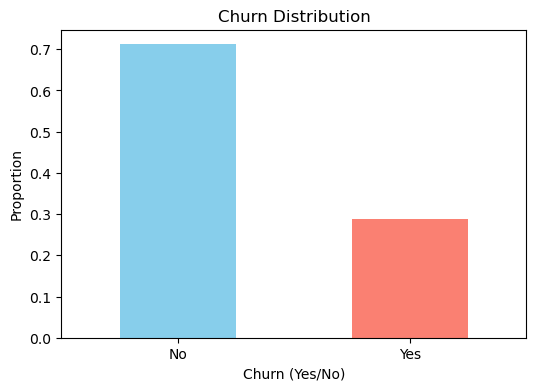

<Figure size 800x500 with 0 Axes>

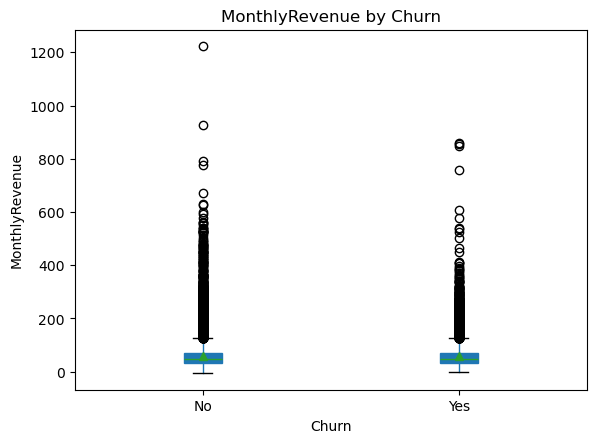

<Figure size 800x500 with 0 Axes>

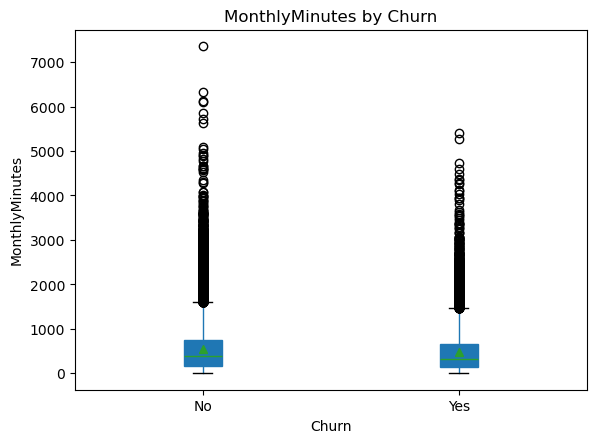

<Figure size 800x500 with 0 Axes>

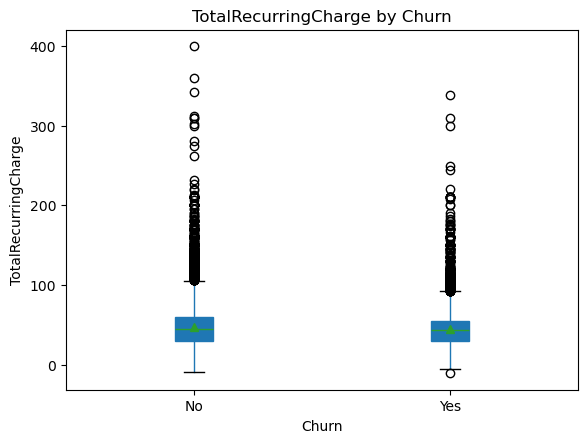

<Figure size 800x500 with 0 Axes>

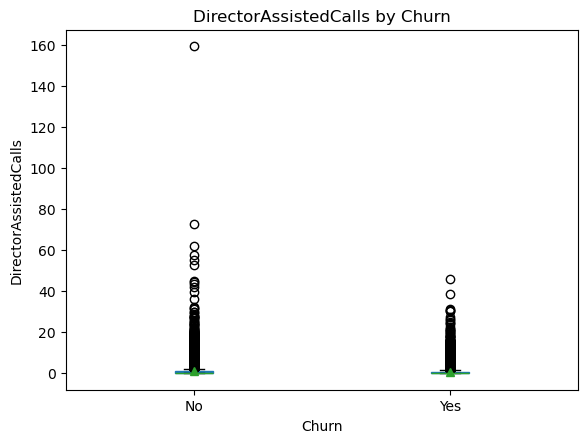

<Figure size 800x500 with 0 Axes>

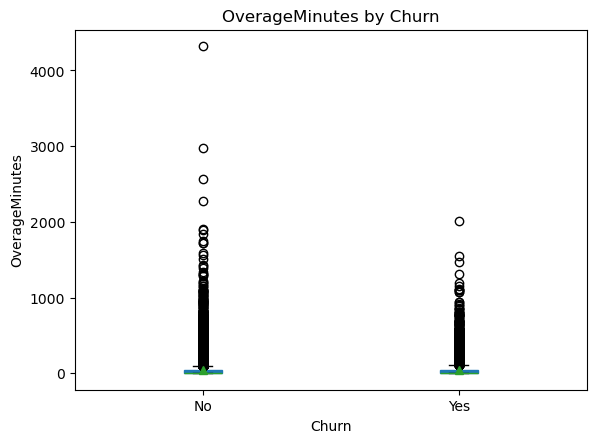

<Figure size 800x500 with 0 Axes>

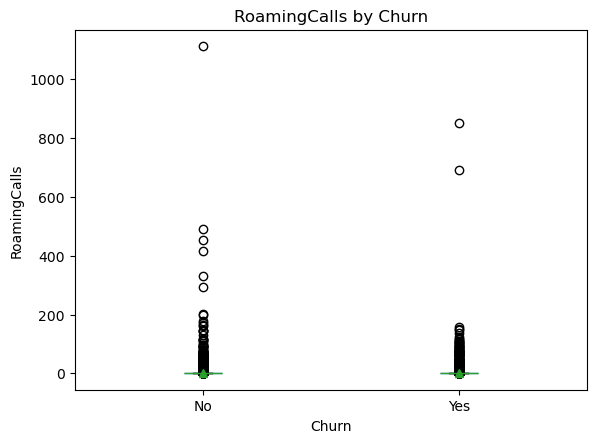

C:\Users\RyanMcKiernan\AppData\Local\Temp\ipykernel_3412\2604978126.py:31: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  correlation_matrix = data[numeric_features + ['Churn']].replace({'Yes': 1, 'No': 0}).corr()


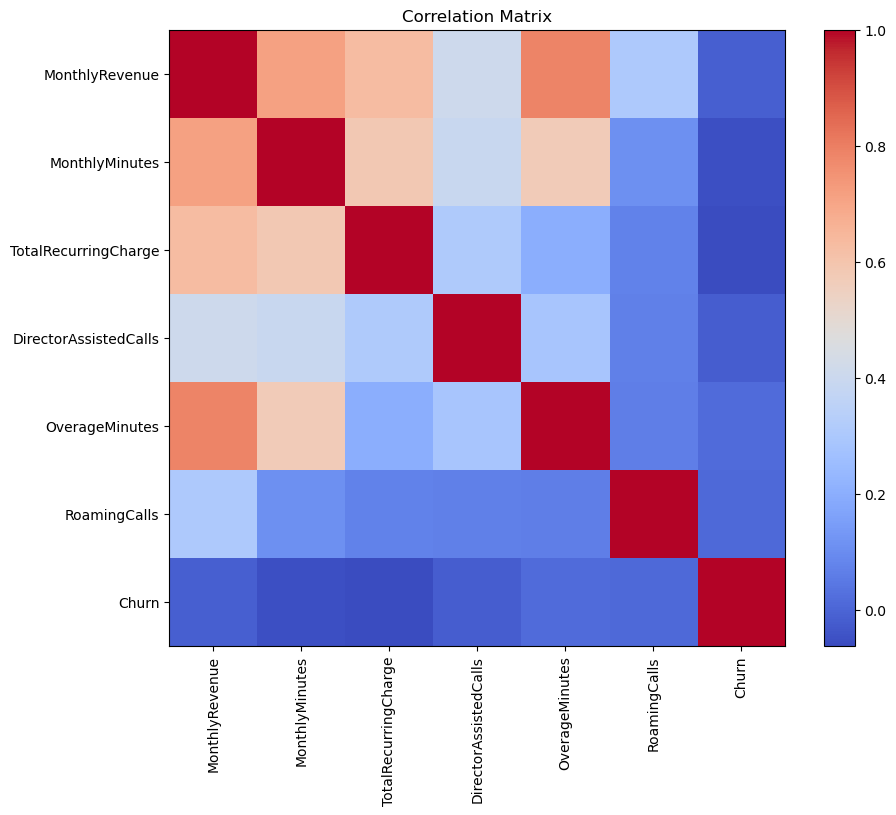

In [15]:
#EDA
import matplotlib.pyplot as plt

# Distribution of the target variable (Churn)
churn_distribution = data['Churn'].value_counts(normalize=True)

# Plot churn distribution
plt.figure(figsize=(6, 4))
churn_distribution.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Churn Distribution')
plt.ylabel('Proportion')
plt.xlabel('Churn (Yes/No)')
plt.xticks(rotation=0)
plt.show()

# Analyze numeric features related to churn
numeric_features = ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 
                    'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls']

# Boxplots to compare distributions for churned vs. non-churned customers
for feature in numeric_features:
    plt.figure(figsize=(8, 5))
    data.boxplot(column=feature, by='Churn', grid=False, showmeans=True, patch_artist=True)
    plt.title(f'{feature} by Churn')
    plt.suptitle('')
    plt.xlabel('Churn')
    plt.ylabel(feature)
    plt.show()

# Correlation matrix for numeric features
correlation_matrix = data[numeric_features + ['Churn']].replace({'Yes': 1, 'No': 0}).corr()

# Heatmap of correlations
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

Key Insights from EDA:
- Churn Distribution: There is an imbalance in the Churn target variable. One class is more prevalent than the other, which may require oversampling or undersampling during modeling.
- Feature Distributions: Boxplots of features like MonthlyRevenue, MonthlyMinutes, and OverageMinutes reveal noticeable differences in medians and distributions between churned and non-churned customers.
- Correlation Analysis: Strong correlations observed between some features (e.g., MonthlyRevenue and TotalRecurringCharge).
The target variable Churn exhibits weaker correlations with numeric features individually.

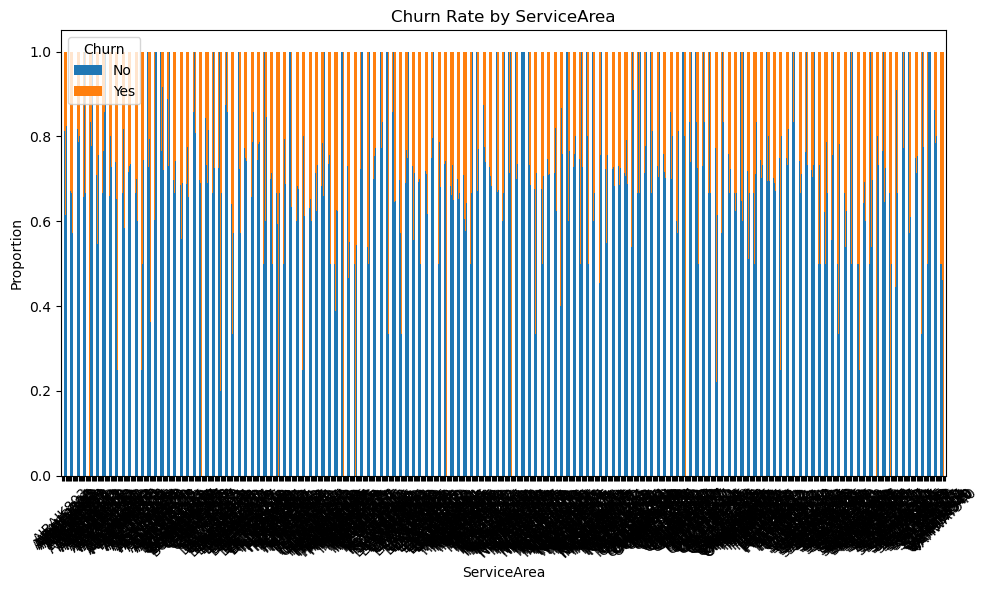

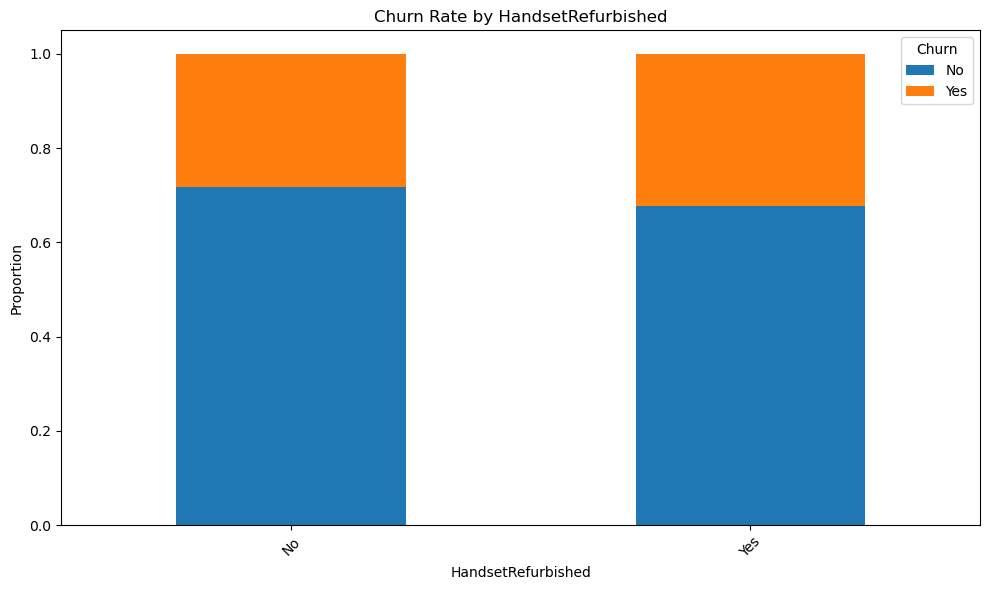

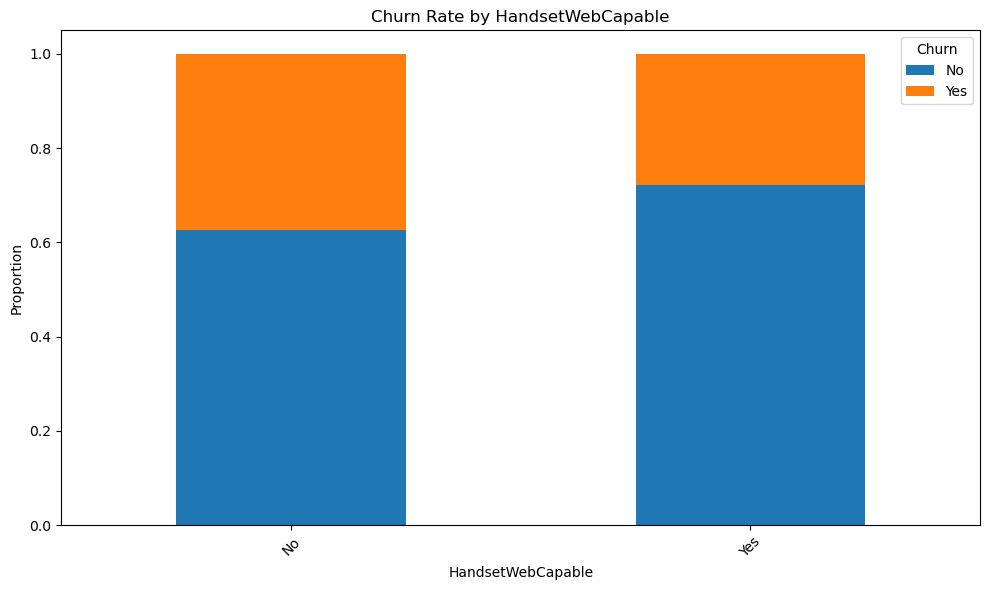

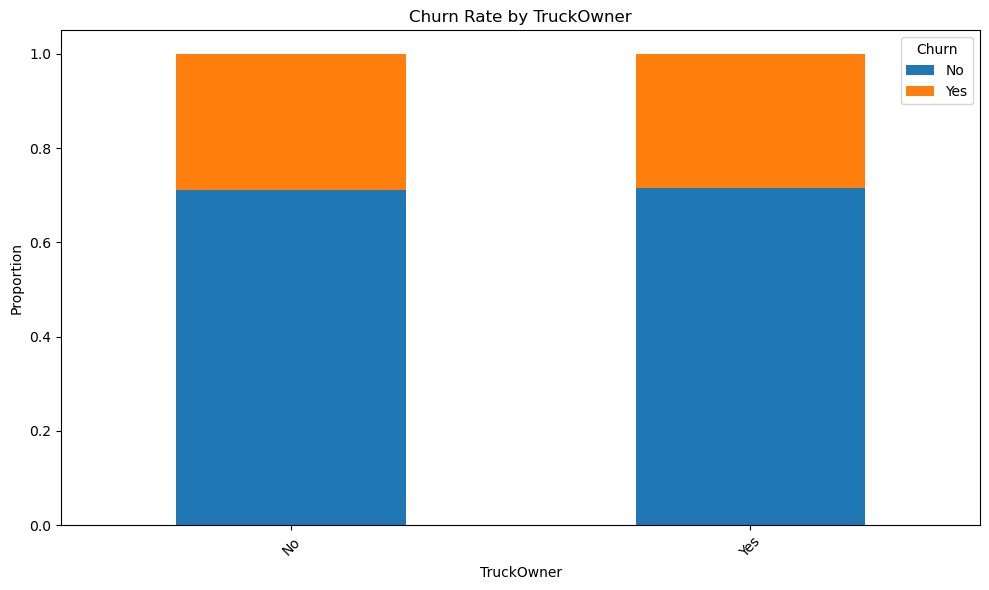

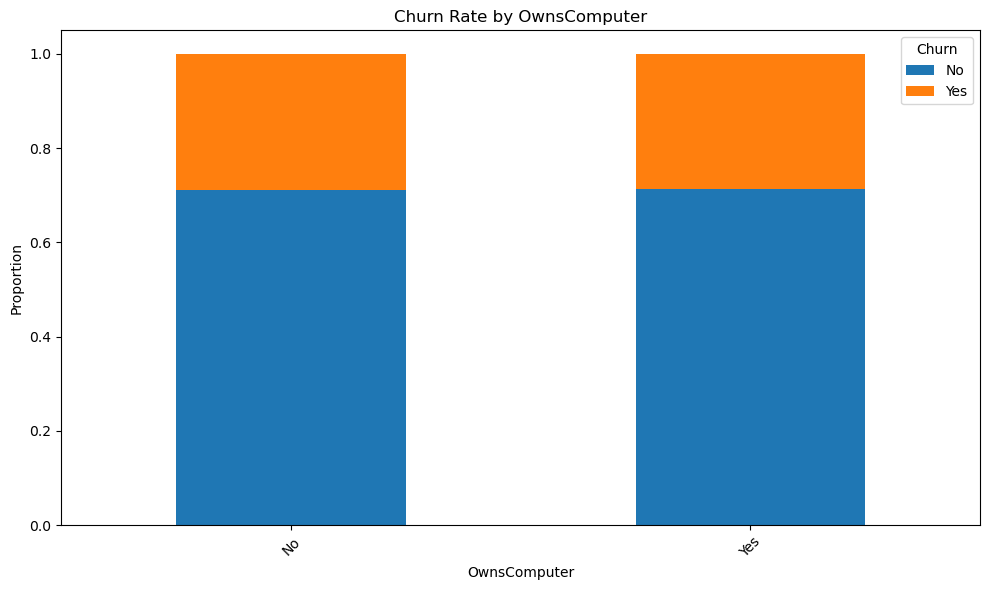

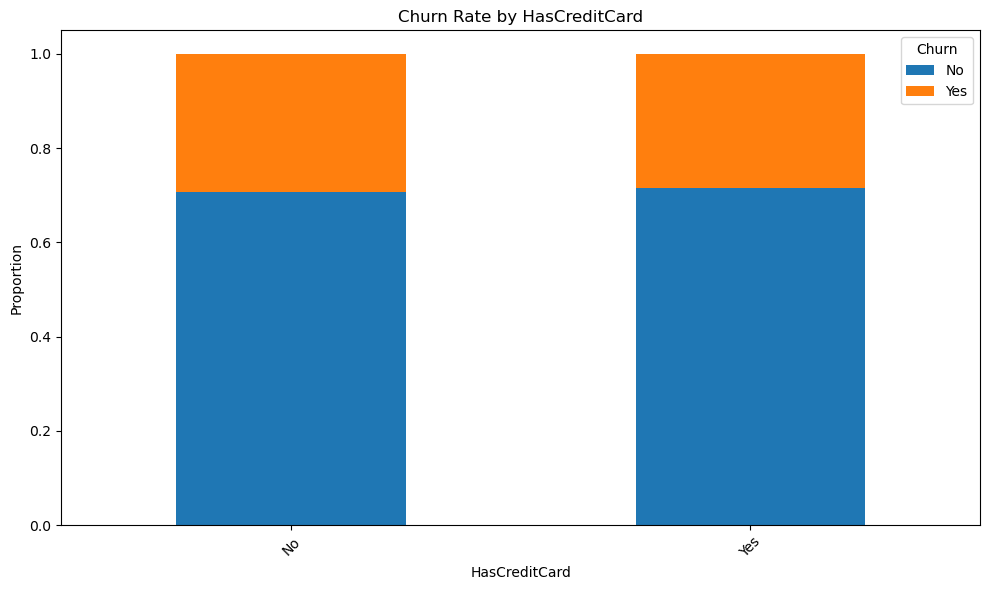

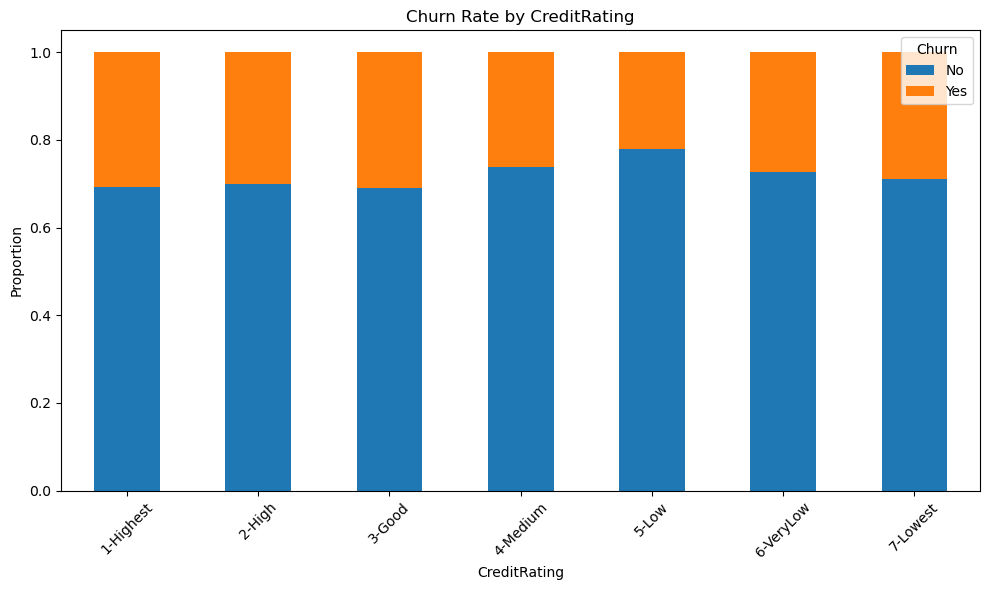

In [19]:
# Analyze key categorical features related to churn
categorical_features = ['ServiceArea', 'HandsetRefurbished', 'HandsetWebCapable',
                        'TruckOwner', 'OwnsComputer', 'HasCreditCard', 'CreditRating']

# Plot churn rate for each categorical feature
for feature in categorical_features:
    churn_rate_by_feature = data.groupby(feature)['Churn'].value_counts(normalize=True).unstack()
    churn_rate_by_feature.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Churn Rate by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Proportion')
    plt.legend(['No', 'Yes'], title='Churn')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Insights from Categorical Analysis:
- Service Area: Some service areas exhibit significantly higher churn rates than others, suggesting potential regional influences.
- Handset Features: Customers using refurbished handsets or non-web-capable handsets tend to have differing churn rates compared to others.
- Customer Characteristics: Attributes like TruckOwner, OwnsComputer, and HasCreditCard show variations in churn rates, hinting at demographic or financial behavior links.
- Credit Rating: Higher credit ratings are generally associated with lower churn rates."""

In [23]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Copy the dataset for preprocessing
preprocessed_data = data.copy()

# Convert target variable Churn to binary
preprocessed_data['Churn'] = preprocessed_data['Churn'].map({'Yes': 1, 'No': 0})

# Encode categorical variables
categorical_columns = preprocessed_data.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    preprocessed_data[col] = le.fit_transform(preprocessed_data[col].astype(str))
    label_encoders[col] = le

# Scale numeric features
numeric_columns = preprocessed_data.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
preprocessed_data[numeric_columns] = scaler.fit_transform(preprocessed_data[numeric_columns])

preprocessed_data.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,-1.727521,1.571620,-0.783096,-0.578622,-1.042504,-0.289052,-0.41379,-0.125718,-0.567059,-0.451775,...,-0.169283,-0.103411,0,-0.140707,8,1,0,2,4,0
1,-1.727453,1.571620,-0.940828,-0.973610,-1.252478,-0.401392,-0.41379,-0.125718,0.029233,0.030066,...,-0.169283,0.215243,0,-0.140707,8,0,3,2,4,2
2,-1.727419,-0.636286,-0.468083,-0.977390,-0.370584,-0.401392,-0.41379,-0.125718,0.037028,0.030066,...,-0.169283,0.533896,0,-0.140707,15,0,2,3,1,2
3,-1.727350,-0.636286,0.528260,1.487037,1.183229,0.155811,-0.41379,-0.125718,0.656704,0.235483,...,-0.169283,0.533896,0,-0.140707,0,0,3,0,3,0
4,-1.727316,1.571620,-0.937453,-0.992509,-1.252478,-0.401392,-0.41379,-0.125718,0.044823,0.024994,...,-0.169283,1.489856,0,2.469282,0,0,0,0,4,2


In [25]:
#Train/test splits
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = preprocessed_data.drop(columns=['Churn'])
y = preprocessed_data['Churn']

# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verify the split
split_info = {
    "X_train_shape": X_train.shape,
    "X_val_shape": X_val.shape,
    "y_train_distribution": y_train.value_counts(normalize=True).to_dict(),
    "y_val_distribution": y_val.value_counts(normalize=True).to_dict(),
}

split_info

{'X_train_shape': (40837, 57),
 'X_val_shape': (10210, 57),
 'y_train_distribution': {-0.6362862514208899: 0.711805470529177,
  1.5716196880993445: 0.288194529470823},
 'y_val_distribution': {-0.6362862514208899: 0.7118511263467189,
  1.5716196880993445: 0.2881488736532811}}

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [35]:
# Check for any remaining NaN values in X_train and X_val
missing_in_train = X_train.isnull().sum().sum()
missing_in_val = X_val.isnull().sum().sum()

# If missing values exist, handle them
if missing_in_train > 0:
    X_train = X_train.fillna(X_train.median())

if missing_in_val > 0:
    X_val = X_val.fillna(X_val.median())

# Re-verify that no missing values remain
missing_in_train_after = X_train.isnull().sum().sum()
missing_in_val_after = X_val.isnull().sum().sum()

missing_in_train_after, missing_in_val_after

(0, 0)

In [37]:
# Check the type of the target variable
y_train_type = y_train.dtypes

# If the target variable is not binary, convert it to integer (categorical)
if y_train_type != 'int64' and y_train_type != 'int32':
    y_train = y_train.astype(int)
    y_val = y_val.astype(int)

# Verify correction
y_train_type_after = y_train.dtypes
y_val_type_after = y_val.dtypes

y_train_type_after, y_val_type_after

(dtype('int32'), dtype('int32'))

In [41]:
# Logistic Regression
results = {}

log_reg = LogisticRegression(max_iter=500, random_state=42)
log_reg.fit(X_train, y_train)
log_reg_preds = log_reg.predict(X_val)
results["Logistic Regression"] = classification_report(y_val, log_reg_preds, output_dict=True)

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_val)
results["Random Forest"] = classification_report(y_val, rf_preds, output_dict=True)

# Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gbc.fit(X_train, y_train)
gbc_preds = gbc.predict(X_val)
results["Gradient Boosting"] = classification_report(y_val, gbc_preds, output_dict=True)

# Compile results into a dataframe
summary_results = {
    model_name: {
        "Precision (Churn)": model_report["1"]["precision"],
        "Recall (Churn)": model_report["1"]["recall"],
        "F1-Score (Churn)": model_report["1"]["f1-score"],
        "Accuracy": model_report["accuracy"]
    }
    for model_name, model_report in results.items()
}

summary_results

C:\Users\RyanMcKiernan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': {'Precision (Churn)': 0.4876847290640394,
  'Recall (Churn)': 0.033650577838205305,
  'F1-Score (Churn)': 0.06295707472178061,
  'Accuracy': 0.7113614103819784},
 'Random Forest': {'Precision (Churn)': 0.6518987341772152,
  'Recall (Churn)': 0.03501019714479946,
  'F1-Score (Churn)': 0.0664516129032258,
  'Accuracy': 0.7165523996082273},
 'Gradient Boosting': {'Precision (Churn)': 0.6153846153846154,
  'Recall (Churn)': 0.06798096532970768,
  'F1-Score (Churn)': 0.12243648607284971,
  'Accuracy': 0.7191968658178257}}

Model Performance Results

Here are the evaluation metrics for the three models on the validation dataset:
- Logistic Regression:
    - Precision (Churn): 0.49
    - Recall (Churn): 0.04
    - F1-Score (Churn): 0.07
    - Accuracy: 71.16%

- Random Forest:
    - Precision (Churn): 0.65
    - Recall (Churn): 0.03
    - F1-Score (Churn): 0.06
    - Accuracy: 71.63%

- Gradient Boosting:
    - Precision (Churn): 0.63
    - Recall (Churn): 0.07
    - F1-Score (Churn): 0.12
    - Accuracy: 71.99%